# MLP testing notebook
I trained the smaller models on a smaller amount of data to find optimum hyperparameters. Once the best settings were found I used this on bigger models trained with more data using a GPU. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import MLPfunctions as mlp
import importlib
from importlib import reload
from sklearn.model_selection import train_test_split

# Create a dataframe from the csv file
dataset = pd.read_csv('HIGGS_train.csv')
# Make the dataset much smaller
dataset_small = dataset.sample(frac=0.1)
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Print all the sizes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(563200, 28)
(140800, 28)
(176000, 28)


In [4]:
# Create the model
hidden_size = 50
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .1
# Adam is the best optimizer. Adam uses momentum.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


Epoch 1/1000, Train Loss: 0.694962739944458, Test Loss: 0.6940897703170776
Epoch 2/1000, Train Loss: 0.694060206413269, Test Loss: 0.6935638785362244
Epoch 3/1000, Train Loss: 0.6935591101646423, Test Loss: 0.6931754946708679
Epoch 4/1000, Train Loss: 0.6931883692741394, Test Loss: 0.6928584575653076
Epoch 5/1000, Train Loss: 0.6928859949111938, Test Loss: 0.6925862431526184
Epoch 6/1000, Train Loss: 0.6926265358924866, Test Loss: 0.692345380783081
Epoch 7/1000, Train Loss: 0.6923965811729431, Test Loss: 0.692126989364624
Epoch 8/1000, Train Loss: 0.6921877861022949, Test Loss: 0.691925585269928
Epoch 9/1000, Train Loss: 0.6919949054718018, Test Loss: 0.6917383074760437
Epoch 10/1000, Train Loss: 0.6918149590492249, Test Loss: 0.6915619373321533
Epoch 11/1000, Train Loss: 0.6916449069976807, Test Loss: 0.6913941502571106
Epoch 12/1000, Train Loss: 0.6914828419685364, Test Loss: 0.6912335753440857
Epoch 13/1000, Train Loss: 0.6913277506828308, Test Loss: 0.6910790205001831
Epoch 14/1000

KeyboardInterrupt: 

In [2]:
# Now lets see how our mach2 model does
# Set the size for four hidden layers and the dropout rate
model2 = mlp.MLP_mach2(28, 300, 220, 100, 30, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/1000, Train Loss: 0.6952064037322998, Test Loss: 0.6923283338546753
Epoch 2/1000, Train Loss: 0.6924740076065063, Test Loss: 0.6915485262870789
Epoch 3/1000, Train Loss: 0.6916215419769287, Test Loss: 0.6910988688468933
Epoch 4/1000, Train Loss: 0.6911607384681702, Test Loss: 0.6906971335411072
Epoch 5/1000, Train Loss: 0.6908056735992432, Test Loss: 0.6902922987937927
Epoch 6/1000, Train Loss: 0.6906963586807251, Test Loss: 0.689930260181427
Epoch 7/1000, Train Loss: 0.690493106842041, Test Loss: 0.6895027160644531
Epoch 8/1000, Train Loss: 0.6901252269744873, Test Loss: 0.6889672875404358
Epoch 9/1000, Train Loss: 0.689578115940094, Test Loss: 0.6884041428565979
Epoch 10/1000, Train Loss: 0.6889495253562927, Test Loss: 0.6877419948577881
Epoch 11/1000, Train Loss: 0.6883424520492554, Test Loss: 0.686891496181488
Epoch 12/1000, Train Loss: 0.6875312924385071, Test Loss: 0.6858280897140503
Epoch 13/1000, Train Loss: 0.6866482496261597, Test Loss: 0.6845870018005371
Epoch 14/100

KeyboardInterrupt: 

In [10]:
model3 = mlp.MLP_mach3(28, 250, 200, 150, 100, 50, 10, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model3.parameters(), lr=lr)
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model3, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
f1, acc, cm = mlp.getResults(train_losses, test_losses, model3, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/100, Train Loss: 0.692429780960083, Test Loss: 0.6921226382255554
Epoch 2/100, Train Loss: 0.692003071308136, Test Loss: 0.6918318271636963
Epoch 3/100, Train Loss: 0.6916661262512207, Test Loss: 0.6915619969367981
Epoch 4/100, Train Loss: 0.691385805606842, Test Loss: 0.6913436651229858
Epoch 5/100, Train Loss: 0.691175639629364, Test Loss: 0.6910753846168518
Epoch 6/100, Train Loss: 0.6908677816390991, Test Loss: 0.6904028058052063
Epoch 7/100, Train Loss: 0.6903401017189026, Test Loss: 0.6894748210906982
Epoch 8/100, Train Loss: 0.6895642280578613, Test Loss: 0.6885915994644165
Epoch 9/100, Train Loss: 0.6888293623924255, Test Loss: 0.6871492266654968
Epoch 10/100, Train Loss: 0.6875709295272827, Test Loss: 0.6849786043167114
Epoch 11/100, Train Loss: 0.6858924627304077, Test Loss: 0.6827300190925598
Epoch 12/100, Train Loss: 0.684144139289856, Test Loss: 0.6800819039344788
Epoch 13/100, Train Loss: 0.6816034913063049, Test Loss: 0.6781975030899048
Epoch 14/100, Train Loss: 

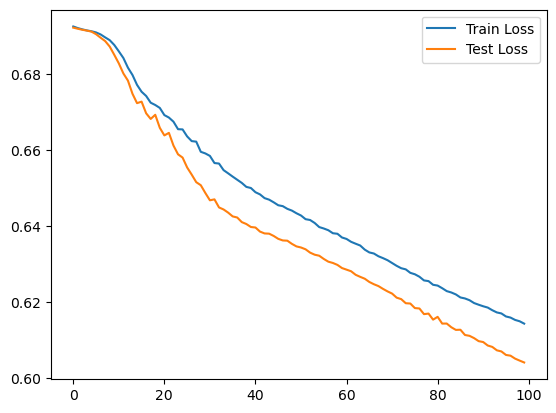

In [15]:
# Now lets see how our mach4 model does
# Set the size for four hidden layers and the dropout rate
reload(mlp)
model4 = mlp.MLP_mach4(28, 150, 120, 90, 60, 30, 10, .2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model4.parameters(), lr=lr)
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model4, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
f1, acc, cm = mlp.getResults(train_losses, test_losses, model4, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/100, Train Loss: 0.7510489821434021, Test Loss: 0.6953123807907104
Epoch 2/100, Train Loss: 0.7364600896835327, Test Loss: 0.7018556594848633
Epoch 3/100, Train Loss: 0.7281211614608765, Test Loss: 0.7032963633537292
Epoch 4/100, Train Loss: 0.7225462198257446, Test Loss: 0.7007282376289368
Epoch 5/100, Train Loss: 0.7183631658554077, Test Loss: 0.6971570253372192
Epoch 6/100, Train Loss: 0.7127454280853271, Test Loss: 0.6939710974693298
Epoch 7/100, Train Loss: 0.7088937163352966, Test Loss: 0.6916778683662415
Epoch 8/100, Train Loss: 0.7048030495643616, Test Loss: 0.6903852820396423
Epoch 9/100, Train Loss: 0.7020050287246704, Test Loss: 0.6898725628852844
Epoch 10/100, Train Loss: 0.6996763944625854, Test Loss: 0.6897658705711365
Epoch 11/100, Train Loss: 0.6981785893440247, Test Loss: 0.6897735595703125
Epoch 12/100, Train Loss: 0.6964243054389954, Test Loss: 0.6897538900375366


KeyboardInterrupt: 